## Deep Learning

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

import torch
from torchvision import transforms

In [ ]:
model = torch.hub.load('pytorch/vision:v0.6.0', 'deeplabv3_resnet101', pretrained=True)
model.eval()
model.to('cuda')

In [ ]:
img = cv2.cvtColor(cv2.imread('/content/iStock-978724388-e1551816982323.jpg'), cv2.COLOR_BGR2RGB)

preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
pre_img = preprocess(img).unsqueeze(0).to('cuda')

with torch.no_grad():
    output = model(pre_img)['out'][0]
output = cv2.resize(output.argmax(0).byte().cpu().numpy(), img.shape[:2][::-1])

In [ ]:
mask = np.array(output)
mask = np.where(mask == 15, mask*17, 0)
fg = cv2.bitwise_and(img, img, mask=mask)
img_blur = cv2.blur(img, (10, 10))
bg = cv2.bitwise_and(img_blur, img_blur, mask=cv2.bitwise_not(mask))
final = cv2.add(fg, bg)

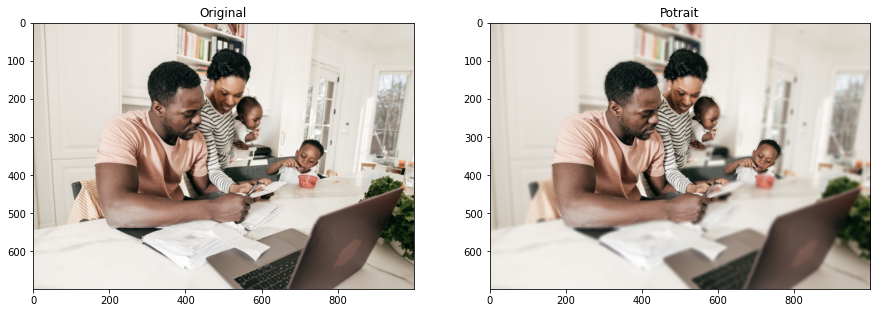

In [ ]:
f, axs = plt.subplots(1,2,figsize=(15,15))

axs[0].imshow(img), axs[0].set_title('Original')
axs[1].imshow(final), axs[1].set_title('Potrait')
plt.show()